<a href="https://colab.research.google.com/github/jonr17/TabGAN_datasets/blob/main/Speed_Target_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script creates three machine learning models, they will all be trained and tested on the same data but can be tuned independantly. The graphs at the bottom combine the results from all the models to make it easy to interpret the performance of each one.





In [ ]:
!pip install -q seaborn

In [ ]:
#Importing libraries

import pandas as pd             #data analysis and manipulation tool
import tensorflow as tf         #machine learning platform
import numpy as np              #array tool
import matplotlib.pyplot as plt #plotting
import seaborn as sns           #data vizualisation


In [ ]:

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
#Import dataset from github, if you want to make your own data set make sure to use the same format as in the one used here.

url = 'https://raw.githubusercontent.com/jonr17/TabGAN_datasets/main/Generated_10k'

column_names = [
    '0.5-speed',
    '0.5-acc',
    '0.5-slip',
    '1-speed',
    '1-acc',
    '1-slip',
    '1.5-speed',
    '1.5-acc',
    '1.5-slip',
    '2-speed',
    '2-acc',
    '2-slip',
    '2.5-speed',
    '2.5-acc',
    '2.5-slip',
    '3-speed',
    '3-acc',
    '3-slip',
    'TrackTemp',
    'TireTemp',
    'Tirepress'
]

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=',', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()        #taking a copy of the dataset to use
dataset = dataset.sample(frac = 1)  #randomizing the order of the data
dataset.head()                      #printing out the top five lines of data

,0.5-speed,0.5-acc,0.5-slip,1-speed,1-acc,1-slip,1.5-speed,1.5-acc,1.5-slip,2-speed,...,2-slip,2.5-speed,2.5-acc,2.5-slip,3-speed,3-acc,3-slip,TrackTemp,TireTemp,Tirepress
4672,11.5,0.818,82.7,24.4,0.439,3.2,33.6,0.542,3.2,33.4,...,2.4,45.0,0.376,4.56,50.6,0.654,3.5,16,60,1.50
8641,12.1,0.256,120.0,17.8,0.530,1.8,28.9,0.222,1.6,37.6,...,7.4,59.2,0.158,1.10,58.3,0.268,16.7,16,87,1.37
4426,10.5,0.256,82.7,20.1,0.530,2.4,31.7,0.296,5.1,40.4,...,3.5,41.4,0.384,4.60,37.9,0.719,1.3,18,57,1.38
1314,8.7,0.558,86.6,17.8,0.289,41.1,33.3,0.356,0.9,37.5,...,3.5,48.5,0.338,2.20,57.1,1.145,16.7,18,93,1.52
6791,11.1,0.794,42.0,23.3,0.393,26.4,23.8,0.598,1.4,34.1,...,2.1,38.6,0.411,9.30,46.8,0.253,6.7,16,75,1.31


In [ ]:
#checking shape
dataset.shape

(10000, 21)

In [ ]:
dataset.columns #This command shows the columns of the data set

Index(['0.5-speed', '0.5-acc', '0.5-slip', '1-speed', '1-acc', '1-slip',
       '1.5-speed', '1.5-acc', '1.5-slip', '2-speed', '2-acc', '2-slip',
       '2.5-speed', '2.5-acc', '2.5-slip', '3-speed', '3-acc', '3-slip',
       'TrackTemp', 'TireTemp', 'Tirepress'],
      dtype='object')

In [ ]:
#making training and test data set

training_data = dataset.sample(frac=0.8, random_state=0) #since the data was randomized when it was loaded in the random state here is set to false. frac 0.8 means that 80% of the data is used for training
testing_data = dataset.drop(training_data.index)         # creates a data set of what is left when the training data is removed

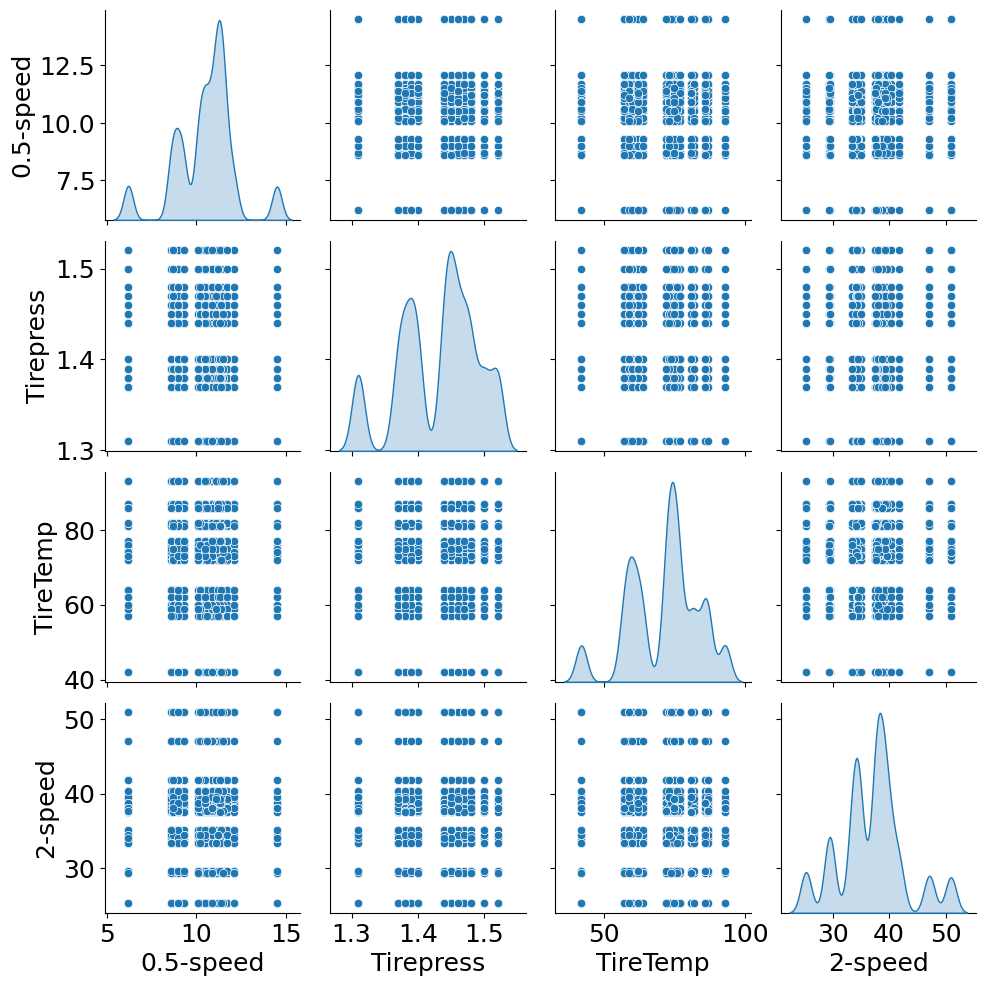

In [ ]:
sns.pairplot(training_data[['0.5-speed', 'Tirepress', 'TireTemp', '2-speed']], diag_kind='kde')

In [ ]:
training_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0.5-speed,8000.0,10.515688,1.630453,6.200,9.300,10.900,11.400,14.500
0.5-acc,8000.0,0.642296,0.283494,0.217,0.424,0.628,0.818,1.300
0.5-slip,8000.0,68.809225,33.004292,1.200,42.000,81.000,94.000,120.000
1-speed,8000.0,20.363088,3.192923,11.000,18.400,20.400,23.200,24.400
1-acc,8000.0,0.396670,0.141318,0.104,0.305,0.393,0.479,0.771
1-slip,8000.0,11.626644,18.017154,0.000,1.800,2.800,16.200,65.800
1.5-speed,8000.0,28.496175,3.631239,23.400,25.100,28.500,31.700,36.400
1.5-acc,8000.0,0.392988,0.109810,0.181,0.318,0.383,0.469,0.598
1.5-slip,8000.0,5.320535,6.119495,0.000,1.600,3.620,6.700,26.000
2-speed,8000.0,37.003937,5.826584,25.300,34.100,37.600,39.600,50.900


In [ ]:
#Split features from labels

training_features = training_data.copy()  #this is the input variables for training
testing_features = testing_data.copy()    #this is the input variables for testing

training_labels = training_data.copy()    #this is the output variables for training
testing_labels = testing_data.copy()      #this is the output variables for testing

#removing all the labels from the training features
training_features.pop('0.5-speed')
training_features.pop('1-speed')
training_features.pop('1.5-speed')
training_features.pop('2-speed')
training_features.pop('2.5-speed')
training_features.pop('3-speed')



testing_features.pop('0.5-speed')
testing_features.pop('1-speed')
testing_features.pop('1.5-speed')
testing_features.pop('2-speed')
testing_features.pop('2.5-speed')
testing_features.pop('3-speed')


training_labels.pop('0.5-acc')
training_labels.pop('0.5-slip')
training_labels.pop('1-acc')
training_labels.pop('1-slip')
training_labels.pop('1.5-acc')
training_labels.pop('1.5-slip')
training_labels.pop('2-acc')
training_labels.pop('2-slip')
training_labels.pop('2.5-acc')
training_labels.pop('2.5-slip')
training_labels.pop('3-acc')
training_labels.pop('3-slip')
training_labels.pop('TrackTemp')
training_labels.pop('TireTemp')
training_labels.pop('Tirepress')


testing_labels.pop('0.5-acc')
testing_labels.pop('0.5-slip')
testing_labels.pop('1-acc')
testing_labels.pop('1-slip')
testing_labels.pop('1.5-acc')
testing_labels.pop('1.5-slip')
testing_labels.pop('2-acc')
testing_labels.pop('2-slip')
testing_labels.pop('2.5-acc')
testing_labels.pop('2.5-slip')
testing_labels.pop('3-acc')
testing_labels.pop('3-slip')
testing_labels.pop('TrackTemp')
testing_labels.pop('TireTemp')
testing_labels.pop('Tirepress')


4672    1.50
5722    1.38
871     1.38
7164    1.48
1478    1.31
        ... 
6970    1.31
2134    1.37
8073    1.46
2857    1.45
6629    1.52
Name: Tirepress, Length: 2000, dtype: float64

In [ ]:
training_labels.tail()

,0.5-speed,1-speed,1.5-speed,2-speed,2.5-speed,3-speed
7920,12.1,21.9,26.6,34.1,46.9,46.8
459,10.5,23.3,32.0,39.3,48.7,40.9
4575,8.7,17.8,23.4,38.0,38.6,50.6
1452,10.1,23.2,25.1,41.8,44.1,50.6
7037,11.4,23.7,31.7,25.3,45.2,53.3


In [ ]:
training_labels.shape

(8000, 6)

In [ ]:
training_data.describe().transpose()[['mean', 'std']]

,mean,std
0.5-speed,10.515688,1.630453
0.5-acc,0.642296,0.283494
0.5-slip,68.809225,33.004292
1-speed,20.363088,3.192923
1-acc,0.396670,0.141318
1-slip,11.626644,18.017154
1.5-speed,28.496175,3.631239
1.5-acc,0.392988,0.109810
1.5-slip,5.320535,6.119495
2-speed,37.003937,5.826584


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(training_features))
print(normalizer.mean.numpy())

[[ 0.642 68.809  0.397 11.627  0.393  5.321  0.427  7.401  0.41   4.196
   0.598  5.645 15.509 71.449  1.431]]


In [ ]:
first = np.array(training_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 0.6   1.2   0.56  1.2   0.38  7.1   0.29 13.8   0.95 17.8   0.64  3.7
  16.   72.    1.31]]

Normalized: [[-0.14 -2.05  1.17 -0.58 -0.09  0.29 -0.66  0.91  3.14  3.2   0.15 -0.42
   0.21  0.05 -2.09]]


Making function to plot loss history


In [ ]:
def plot_loss(history, name):
  plt.plot(history.history['loss'], label='loss '+name)
  plt.plot(history.history['val_loss'], label='val_loss '+name)
  plt.ylim([0, 50])
  plt.xlabel('Epoch')
  plt.ylabel('Error [km/h]')
  plt.legend()
  plt.grid(True)
  plt.rc('axes', titlesize=30)     # fontsize of the axes title
  plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
  plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
  plt.rc('ytick', labelsize=18)    # fontsize of the tick labels

Building the first model

In [ ]:
from keras.api._v2.keras import metrics
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation = 'relu'),
      layers.Dense(32, activation = 'relu'),
      layers.Dense(6)
  ])

  model.compile(loss='mean_squared_error',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
  return model


In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliz  (None, 15)                31        
 ation)                                                          
                                                                 
 dense_203 (Dense)           (None, 64)                1024      
                                                                 
 dense_204 (Dense)           (None, 32)                2080      
                                                                 
 dense_205 (Dense)           (None, 6)                 198       
                                                                 
Total params: 3333 (13.02 KB)
Trainable params: 3302 (12.90 KB)
Non-trainable params: 31 (128.00 Byte)
_________________________________________________________________


In [ ]:
# training the model

%%time
history = dnn_model.fit(
    training_features,
    training_labels,
    validation_split=0.2,
    epochs=100)         #how many times the model should go through the data set
                        #how many data points it should see before making adjustments to the model

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 649.3002 - accuracy: 0.2548 - val_loss: 55.6508 - val_accuracy: 0.5562
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 46.4308 - accuracy: 0.7462 - val_loss: 43.3679 - val_accuracy: 0.7613
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 41.9184 - accuracy: 0.7538 - val_loss: 40.3255 - val_accuracy: 0.7613
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 39.2011 - accuracy: 0.7538 - val_loss: 38.1476 - val_accuracy: 0.7613
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 37.1653 - accuracy: 0.7538 - val_loss: 36.3069 - val_accuracy: 0.7613
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 35.4752 - accuracy: 0.7538 - val_loss: 34.8437 - val_accuracy: 0.7613
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 34.0861 - accuracy: 0.7538 - val_loss: 33.6084 - val_a

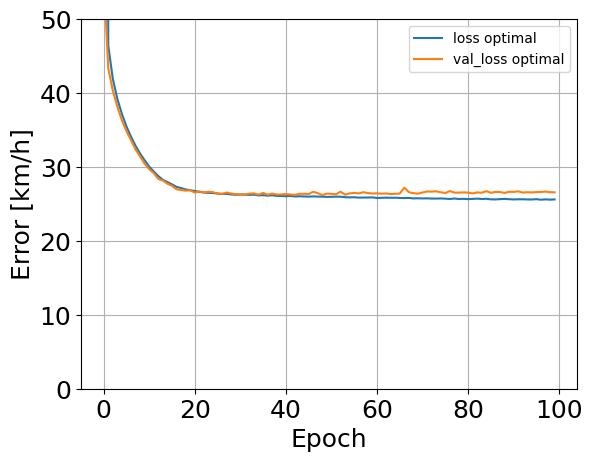

In [ ]:
plot_loss(history, 'optimal') #the loss history of the model

The function below creates a scatter plot of predictions from the model. A close proximity to the line means an accurate prediction.

63/63 [==============================] - 0s 5ms/step


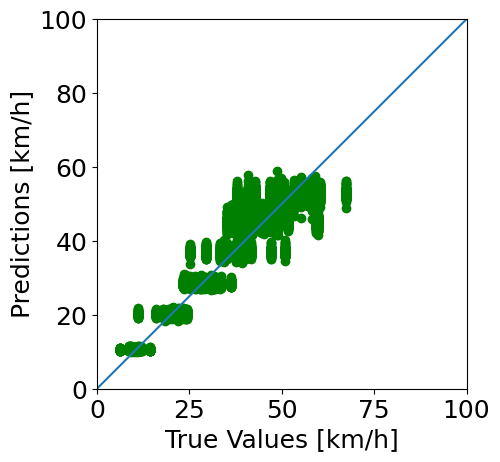

In [ ]:
test_predictions = dnn_model.predict(testing_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(testing_labels, test_predictions, color='green')
plt.xlabel('True Values [km/h]')
plt.ylabel('Predictions [km/h]')
lims = [0, 100]
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.xlim(lims)
plt.ylim(lims)

_ = plt.plot(lims, lims)

In [ ]:
dnn_model.evaluate(testing_features,testing_labels) #This command evaluates the performance of the model

63/63 [==============================] - 0s 2ms/step - loss: 27.1677 - accuracy: 0.7515


[27.1677303314209, 0.7515000104904175]

In [ ]:
test_predictions = split_array(test_predictions)

df_test_predictions = pd.DataFrame(test_predictions, columns = ['0.5-speed', '1-speed', '1.5-speed',
                '2-speed', '2.5-speed', '3-speed'])

print(df_test_predictions)
print(type(df_test_predictions))

    0.5-speed    1-speed  1.5-speed    2-speed  2.5-speed    3-speed
0   13.393887  30.183634  38.139729  49.544231  62.488270  73.216881
1    9.162755  15.717342  23.354069  27.911446  35.254578  40.995235
2    8.168249  16.296673  21.986553  27.403118  34.581425  39.524761
3   12.024778  22.151073  33.139362  40.547466  50.186016  60.607952
4    6.093646  11.518324  17.872570  22.192642  26.868700  33.925858
5    9.854026  19.644468  26.885210  33.544407  42.051884  47.868542
6   10.389334  19.248163  29.089373  36.116436  44.338818  54.253929
7   10.350575  18.876608  25.703987  30.948650  39.917042  44.125847
8    8.833223  14.798727  21.678408  26.175198  33.518501  40.614014
9   11.148691  21.446016  31.578230  39.208885  48.196957  57.483150
10  10.420079  17.742661  26.075491  31.053419  39.451008  45.013729
11   7.739195  14.794045  20.930834  26.338804  32.906425  39.661476
12  10.811626  21.809589  32.339607  40.853477  49.373913  60.206791
13   7.609028  14.993282  21.53793